# Capstone Project - Battle of the Neighborhoods- Best Cities to live in Botswana, Africa

## Step 1 - Import the required Python Libraries and Packages

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab *already downloaded
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libgcc-ng-9.3.0            |      h2828fa1_18         7.8 MB  conda-forge
    _openmp_mutex-4.5          |            1_gnu          22 KB  conda-forge
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    libgomp-9.3.0              |      h2828fa1_18         376 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    openssl-1.1.1i             |       h7f98852_0         2.1 MB  conda-forge
    ca-certificat

## Step 2 - Scrape the names of cities from Wikepedia and form a data frame of city details

In [16]:
#Scrape the data from wiki
url='https://en.wikipedia.org/wiki/List_of_cities_in_Botswana'

df = pd.read_html(url)

#Transfer to data frame
df_cities=df[1]

print('Imported dataframe has', df_cities['Name'].count(), "entries")

df_cities

Imported dataframe has 82 entries


,Rank,Name,District,Census District,Population 2001.[1],Male Population,Female Population
0,1.0,Gaborone,South-East District,Gaborone,231592,91823,94184
1,2.0,Francistown,North-East District,Francistown,98961,40134,42889
2,3.0,Molepolole,Kweneng District,Kweneng East,73103,28617,34122
3,4.0,Serowe,Central District,Central Serowe/Palapye,57588,25400,27431
4,5.0,Selibe Phikwe,Central District,Selibe Phikwe,49411,24334,25515
5,6.0,Maun,North-West District,Ngamiland East,65693,23714,26108
6,7.0,Kanye,Southern District,Ngwaketse,52214,22451,25692
7,8.0,Mahalapye,Central District,Central Mahalapye,43538,21120,22418
8,9.0,Mogoditshane,Kweneng District,Kweneng East,58632,20972,19781
9,10.0,Mochudi,Kgatleng District,Kgatleng,39349,18490,20859


In [10]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 0K2IMC41A5X3P2ID4PN43EI2ZNM1XAZPLRENHS1M1EOTBMR0
CLIENT_SECRET:ZVRAKK4DKPYONWEH4X4KQE3B0AAKMB2QMCLNTZVDHA3HXY0Q


## Step 3 - Clean Dataset and extract the location coordinates using geopy library

In [17]:
#Consider the top 10 cities by population
df_cities=df_cities.sort_values(by="Population 2001.[1]",ascending=False)[0:10]

#Drop unnecessary details like Rank and Population and add columns for location coordinates
df_cities = df_cities.drop(['Rank','Census District','Population 2001.[1]','Male Population','Female Population'], 1)

df_cities["Latitude"] = np.nan
df_cities["Longitude"] = np.nan

In [18]:
geolocator = Nominatim(user_agent="foursquare_agent")

#loop until you get the coordinates
for ind in df_cities.index:
  location = geolocator.geocode('{}, Botswana'.format(df_cities['Name'][ind]))
  if location:
      df_cities.at[ind, 'Latitude']= location.latitude
      df_cities.at[ind, 'Longitude']= location.longitude 



In [19]:
#remove cities with no location details  
df_cities=df_cities[df_cities['Latitude'].astype(str)!='nan']

df_cities.reset_index(drop=True)
df_cities.shape

df_cities.head(10)

,Name,District,Latitude,Longitude
0,Gaborone,South-East District,-24.658136,25.908847
1,Francistown,North-East District,-21.166360,27.502515
2,Molepolole,Kweneng District,-24.405803,25.515165
5,Maun,North-West District,-19.986095,23.422435
8,Mogoditshane,Kweneng District,-24.632519,25.871364
3,Serowe,Central District,-22.397760,26.703289
6,Kanye,Southern District,-24.976611,25.335886
4,Selibe Phikwe,Central District,-21.974605,27.842536
7,Mahalapye,Central District,-23.111642,26.832672
9,Mochudi,Kgatleng District,-24.382860,26.148950


## Step 4 - View the cities on Map of Botswana, Africa

In [20]:
address = 'Botswana'

location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Botswana, Africa are {}, {}.'.format(latitude_x, longitude_y))

map_Botswana = folium.Map(location=[latitude_x, longitude_y], zoom_start=6)

for lat, lng, nei in zip(df_cities['Latitude'], df_cities['Longitude'], df_cities['Name']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Botswana)  
    
map_Botswana


The Geograpical Co-ordinate of Botswana, Africa are -23.1681782, 24.5928742.


## Step 5 - Extract nearby venues using Foursquare API and group Venues by City for Analysis

In [21]:
#Function to extract nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City Name', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# various venues registered on Foursquare in '20 km' radius from city centre
City_venues = getNearbyVenues(names=df_cities['Name'],
                                   latitudes=df_cities['Latitude'],
                                   longitudes=df_cities['Longitude'],radius=20000
                                  )

print('There are', City_venues['Venue'].count(), "such venues")
City_venues.head()

There are 95 such venues


,City Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gaborone,-24.658136,25.908847,The Daily Grind,-24.655306,25.918803,Café
1,Gaborone,-24.658136,25.908847,Masa Centre,-24.652556,25.904026,Shopping Mall
2,Gaborone,-24.658136,25.908847,Lansmore Hotel,-24.652511,25.904034,Hotel
3,Gaborone,-24.658136,25.908847,Sanitas,-24.691991,25.914418,Food
4,Gaborone,-24.658136,25.908847,Bull And Bush,-24.639994,25.910556,Steakhouse


In [24]:
City_venues.shape

(95, 7)

In [25]:
print('There are {} Uniques Categories.'.format(len(City_venues['Venue Category'].unique())))

There are 34 Uniques Categories.


In [26]:
City_venues.groupby('City Name').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City Name,,,,,,
Francistown,7,7,7,7,7,7
Gaborone,30,30,30,30,30,30
Kanye,1,1,1,1,1,1
Mahalapye,4,4,4,4,4,4
Maun,5,5,5,5,5,5
Mochudi,6,6,6,6,6,6
Mogoditshane,30,30,30,30,30,30
Molepolole,5,5,5,5,5,5
Selibe Phikwe,3,3,3,3,3,3


##  Step 6:  Analyze Each City and arrange by most popular Venue Category

In [27]:
# one hot encoding
venues_onehot = pd.get_dummies(City_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['City Name'] = City_venues['City Name'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,City Name,Airport,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bar,Bed & Breakfast,Bistro,Boarding House,Brazilian Restaurant,Burger Joint,Burmese Restaurant,Bus Station,Café,Cocktail Bar,Coffee Shop,Convenience Store,Eastern European Restaurant,Farm,Fast Food Restaurant,Food,Grocery Store,Hotel,Mexican Restaurant,National Park,Park,Portuguese Restaurant,Pub,Resort,Restaurant,Shopping Mall,Soccer Stadium,Sports Club,Stadium,Steakhouse
0,Gaborone,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Gaborone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Gaborone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Gaborone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Gaborone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
venues_onehot.shape

(95, 35)

In [29]:
city_grouped_4_cluster = venues_onehot.groupby('City Name').mean().reset_index()
city_grouped=venues_onehot.groupby('City Name').sum().reset_index()
city_grouped['Total'] = city_grouped.sum(axis=1)
city_grouped.head()

,City Name,Airport,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bar,Bed & Breakfast,Bistro,Boarding House,Brazilian Restaurant,Burger Joint,Burmese Restaurant,Bus Station,Café,Cocktail Bar,Coffee Shop,Convenience Store,Eastern European Restaurant,Farm,Fast Food Restaurant,Food,Grocery Store,Hotel,Mexican Restaurant,National Park,Park,Portuguese Restaurant,Pub,Resort,Restaurant,Shopping Mall,Soccer Stadium,Sports Club,Stadium,Steakhouse,Total
0,Francistown,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,2,0,0,0,0,7
1,Gaborone,0,1,1,0,0,0,1,0,1,1,0,0,4,1,2,1,0,0,0,1,0,5,1,0,1,1,0,0,2,4,1,0,0,1,30
2,Kanye,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,Mahalapye,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
4,Maun,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,5


In [31]:
#Function to return list of most common venues 1st to 10th
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:-1]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    i=0
    a = pd.Series(range(0,num_top_venues))
    for index, value in row_categories_sorted.items():
        if value==0:
            a[i]="None"
        else:
            a[i]=index
        i=i+1  
        
    return a.values[0:num_top_venues]

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City Name','Total']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City Name'] = city_grouped['City Name']
city_venues_sorted['Total'] = city_grouped['Total']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 2:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted_total=city_venues_sorted.sort_values(by='Total',ascending=False)
city_venues_sorted_total=city_venues_sorted_total.reset_index(drop=True)
city_venues_sorted_total.head()

,City Name,Total,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gaborone,30,Hotel,Café,Shopping Mall,Restaurant,Coffee Shop,Steakhouse,Cocktail Bar,Convenience Store,Brazilian Restaurant,Bistro
1,Mogoditshane,30,Hotel,Shopping Mall,Café,Coffee Shop,Steakhouse,Food,Arts & Crafts Store,Asian Restaurant,Bistro,Brazilian Restaurant
2,Francistown,7,Shopping Mall,Airport,Pub,Hotel,Portuguese Restaurant,Bed & Breakfast,None,None,None,None
3,Mochudi,6,Convenience Store,Farm,Bar,Grocery Store,Hotel,Burmese Restaurant,None,None,None,None
4,Maun,5,Shopping Mall,Food,Portuguese Restaurant,Hotel,National Park,None,None,None,None,None


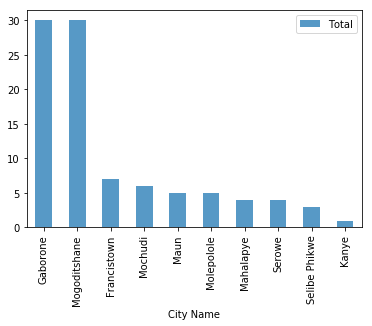

In [39]:
# Bar chart on cities with most Foursquare Venues in 20 km radius from City Centre

city_venues_sorted_total.plot(kind='bar',x='City Name',y='Total',alpha=0.75)

## Step 7 - Cluster Cities using k-means Algorithm


Run _k_-means to cluster the neighborhood into 5 clusters.


In [49]:
# set number of clusters
kclusters = 5

city_grouped_clustering = city_grouped_4_cluster.drop('City Name', 1)

#city_grouped_clustering

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 1, 3, 2, 0, 2, 0, 4, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [50]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [51]:


city_merged = df_cities

# merge city_grouped with df_city to add latitude/longitude for each neighborhood
city_merged = city_venues_sorted.join(city_merged.set_index('Name'), on='City Name')

city_merged.shape # check the last columns!

(10, 16)

Finally, let's visualize the resulting clusters


In [53]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['Latitude'], city_merged['Longitude'], city_merged['City Name'], city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Step 8 - Examine Clusters


Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


#### Cluster 1


In [54]:
city_merged.loc[city_merged['Cluster Labels'] == 0, city_merged.columns[[1] + list(range(2, city_merged.shape[1]))]]

,City Name,Total,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,District,Latitude,Longitude
5,Mochudi,6,Convenience Store,Farm,Bar,Grocery Store,Hotel,Burmese Restaurant,None,None,None,None,Kgatleng District,-24.382860,26.148950
7,Molepolole,5,Convenience Store,Stadium,Shopping Mall,Fast Food Restaurant,None,None,None,None,None,None,Kweneng District,-24.405803,25.515165


#### Cluster 2

In [55]:
city_merged.loc[city_merged['Cluster Labels'] == 1, city_merged.columns[[1] + list(range(2, city_merged.shape[1]))]]

,City Name,Total,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,District,Latitude,Longitude
2,Kanye,1,Shopping Mall,None,None,None,None,None,None,None,None,None,Southern District,-24.976611,25.335886


#### Cluster 3

In [56]:
city_merged.loc[city_merged['Cluster Labels'] ==2, city_merged.columns[[1] + list(range(2, city_merged.shape[1]))]]

,City Name,Total,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,District,Latitude,Longitude
0,Francistown,7,Shopping Mall,Airport,Pub,Hotel,Portuguese Restaurant,Bed & Breakfast,None,None,None,None,North-East District,-21.166360,27.502515
1,Gaborone,30,Hotel,Café,Shopping Mall,Restaurant,Coffee Shop,Steakhouse,Cocktail Bar,Convenience Store,Brazilian Restaurant,Bistro,South-East District,-24.658136,25.908847
4,Maun,5,Shopping Mall,Food,Portuguese Restaurant,Hotel,National Park,None,None,None,None,None,North-West District,-19.986095,23.422435
6,Mogoditshane,30,Hotel,Shopping Mall,Café,Coffee Shop,Steakhouse,Food,Arts & Crafts Store,Asian Restaurant,Bistro,Brazilian Restaurant,Kweneng District,-24.632519,25.871364


#### Cluster 4

In [57]:
city_merged.loc[city_merged['Cluster Labels'] == 3, city_merged.columns[[1] + list(range(2, city_merged.shape[1]))]]

,City Name,Total,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,District,Latitude,Longitude
3,Mahalapye,4,Eastern European Restaurant,Boarding House,Shopping Mall,Bus Station,None,None,None,None,None,None,Central District,-23.111642,26.832672
9,Serowe,4,Bus Station,Shopping Mall,Restaurant,Resort,None,None,None,None,None,None,Central District,-22.397760,26.703289


#### Cluster 5

In [59]:
city_merged.loc[city_merged['Cluster Labels'] == 4, city_merged.columns[[1] + list(range(2, city_merged.shape[1]))]]

,City Name,Total,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,District,Latitude,Longitude
8,Selibe Phikwe,3,Sports Club,BBQ Joint,Hotel,None,None,None,None,None,None,None,Central District,-21.974605,27.842536


## Conclusion: In this project, using k-means cluster algorithm I separated the cities into 5(Five) different clusters of similar Cities. Looking at the data Cluster 3 comprising of Gaborone, Francistown, Maun and Mogoditshane are the most liveable cities in Botswana based on Foursquare Registered Venues!

## I have noticed that there are very few businesses registered/ rated on Foursquare compared to the many operating in Botswana.

### Thank You!